In [106]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt

In [126]:
rain = pd.read_csv("C:/Users/Hp Pc/Downloads/Rainfall_data.csv")

In [127]:
rain

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation,Date
0,2000,1,1,8.06,48.25,23.93,0.00,1/1/2000
1,2000,2,1,8.73,50.81,25.83,0.11,2/1/2000
2,2000,3,1,8.48,42.88,26.68,0.01,3/1/2000
3,2000,4,1,13.79,55.69,22.49,0.02,4/1/2000
4,2000,5,1,17.40,70.88,19.07,271.14,5/1/2000
...,...,...,...,...,...,...,...,...
247,2020,8,1,20.08,92.31,5.34,1203.09,8/1/2020
248,2020,9,1,19.71,90.12,9.22,361.30,9/1/2020
249,2020,10,1,18.43,82.69,12.62,180.18,10/1/2020
250,2020,11,1,14.83,76.06,16.95,0.49,11/1/2020


In [128]:
rain['Date'] = pd.to_datetime(rain['Date'])
rain = rain.set_index('Date')

In [130]:
rain.drop(labels=['Year', 'Month', 'Day'], inplace=True, axis=1)

<Axes: xlabel='Date'>

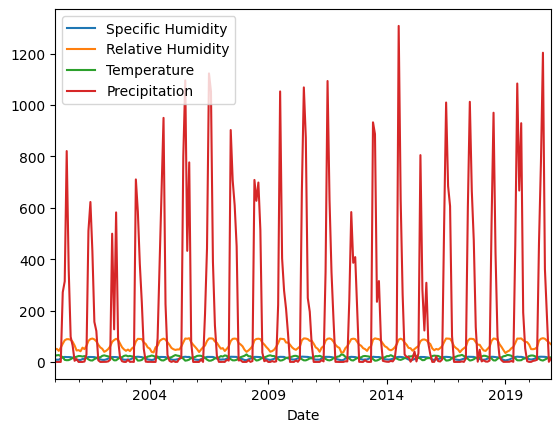

In [131]:
rain.plot()

<Axes: xlabel='Date'>

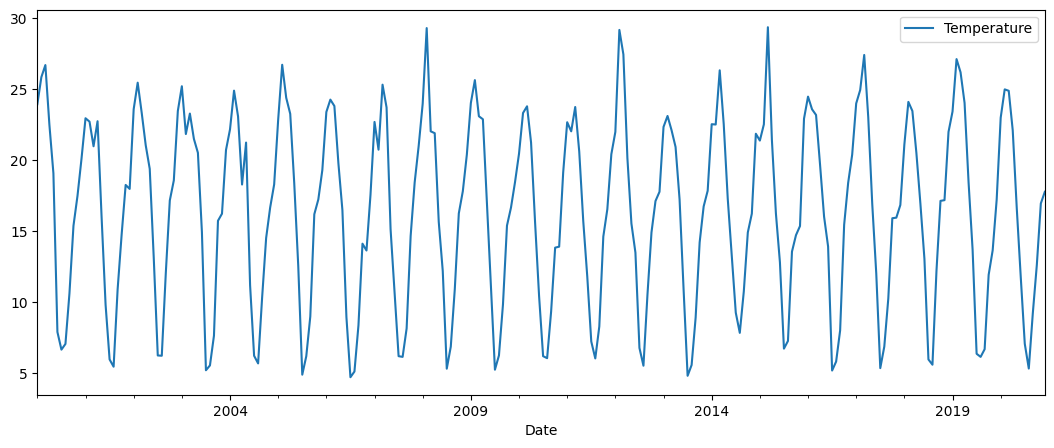

In [132]:
rain[['Temperature']].plot(figsize=(13,5))

<Axes: xlabel='Date'>

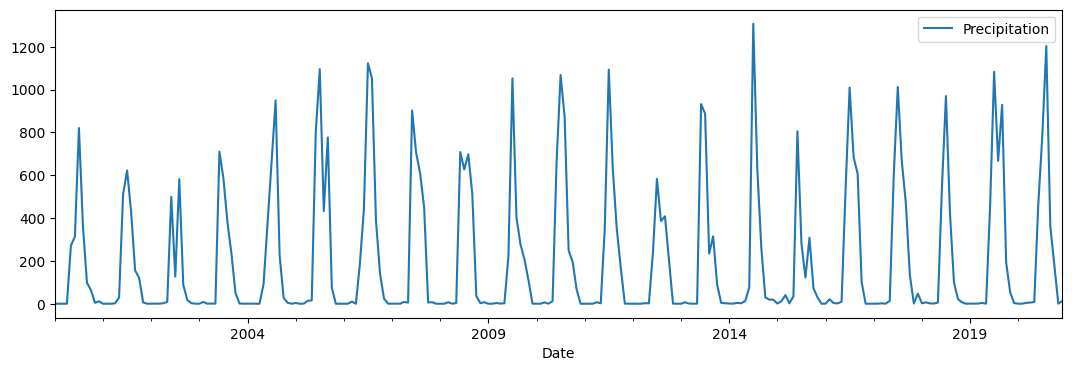

In [133]:
rain[['Precipitation']].plot(figsize=(13,4))

<Axes: xlabel='Date'>

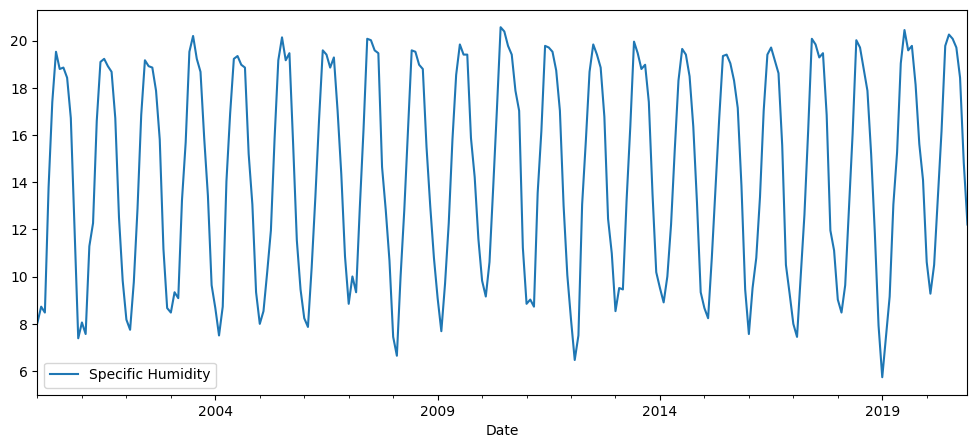

In [134]:
rain[['Specific Humidity']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

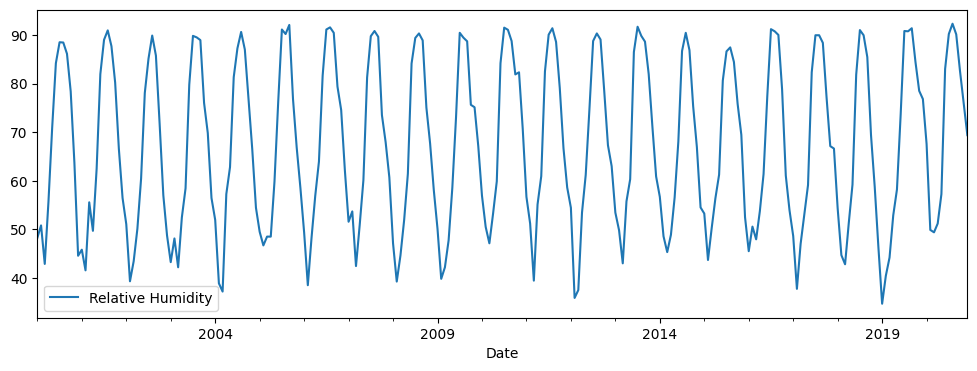

In [135]:
rain[['Relative Humidity']].plot(figsize=(12,4))

STATIONARITY TEST

In [136]:
from statsmodels.tsa.stattools import adfuller

In [137]:
def adfuller_test(df):
    result = adfuller(df)
    labels = ['Adfuller Test', 'P-Value', '#Lags Used', 'Number of Observation used']
    for value, label  in zip(result,labels):
        print(label+' : '+ str(value))
    if result[1] <= 0.05:
        print("Reject the Null Hypothesis(HO).Hence, Time Series is Stationary")
    else:
        print('Weak Evidence against Null Hypothesis. Time Series is not Stationary')

In [138]:
adfuller_test(rain['Temperature'])

Adfuller Test : -4.469188333889171
P-Value : 0.00022344504386941067
#Lags Used : 15
Number of Observation used : 236
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


In [139]:
adfuller_test(rain['Precipitation'])

Adfuller Test : -2.4663249017732727
P-Value : 0.12388427626757775
#Lags Used : 12
Number of Observation used : 239
Weak Evidence against Null Hypothesis. Time Series is not Stationary


In [140]:
adfuller_test(rain['Specific Humidity'])

Adfuller Test : -4.431131883517154
P-Value : 0.00026135713312323887
#Lags Used : 16
Number of Observation used : 235
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


In [141]:
adfuller_test(rain['Relative Humidity'])

Adfuller Test : -4.260514730142818
P-Value : 0.0005195959357929852
#Lags Used : 15
Number of Observation used : 236
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


All Features of rain are stationary left for Precipitation

In [142]:
#PACF & ACF FOR TEMPERATURE AND PRECIPIATION

In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [144]:
#DIFFERENCING ON MONTHLY DATA

rain['Precipitation_12_Diff'] = rain['Precipitation'] - rain['Precipitation'].shift(12)

In [23]:
adfuller_test(rain['Precipitation_12_Diff'].dropna())

Adfuller Test : -5.852634925203148
P-Value : 3.5597255461736624e-07
#Lags Used : 12
Number of Observation used : 227
Reject the Null Hypothesis(HO).Hence, Time Series is Stationary


Text(0.5, 1.0, 'Temperature ACF')

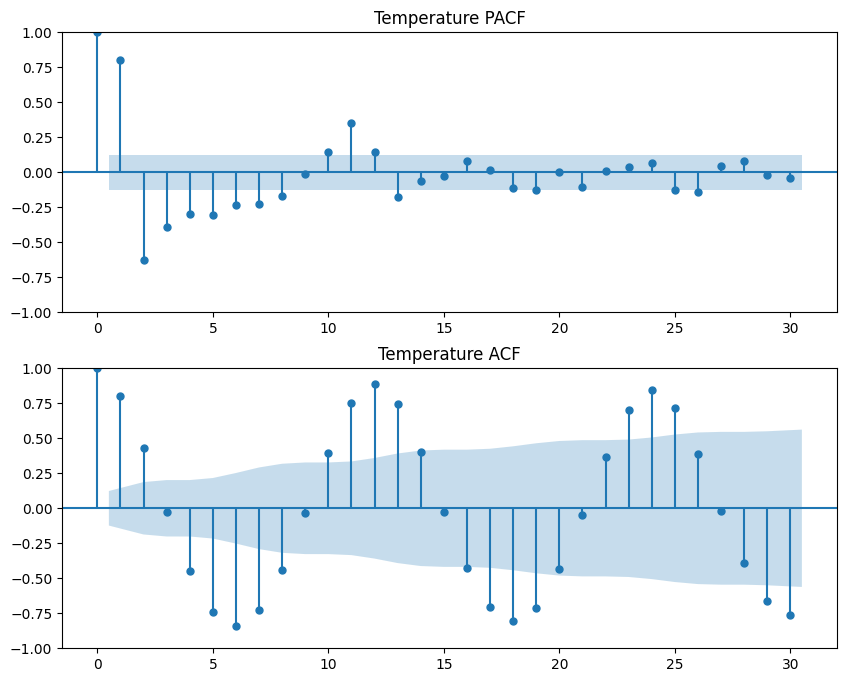

In [26]:
#using Partial Autocorrelation.PACF for AR Models
#Using Autocorrelation.ACF for MA Models

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(rain['Temperature'].dropna(), lags=30, ax=ax1)
ax1.set_title('Temperature PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(rain['Temperature'].dropna(), lags=30, ax=ax2)
ax2.set_title('Temperature ACF')

#AR(PACF) = The Graph has a gradual exponential Decay from 1 - 8
#MA(ACF) = The Graph shows a seasonal repetition of Decays

Text(0.5, 1.0, 'Precipitation_Diff ACF')

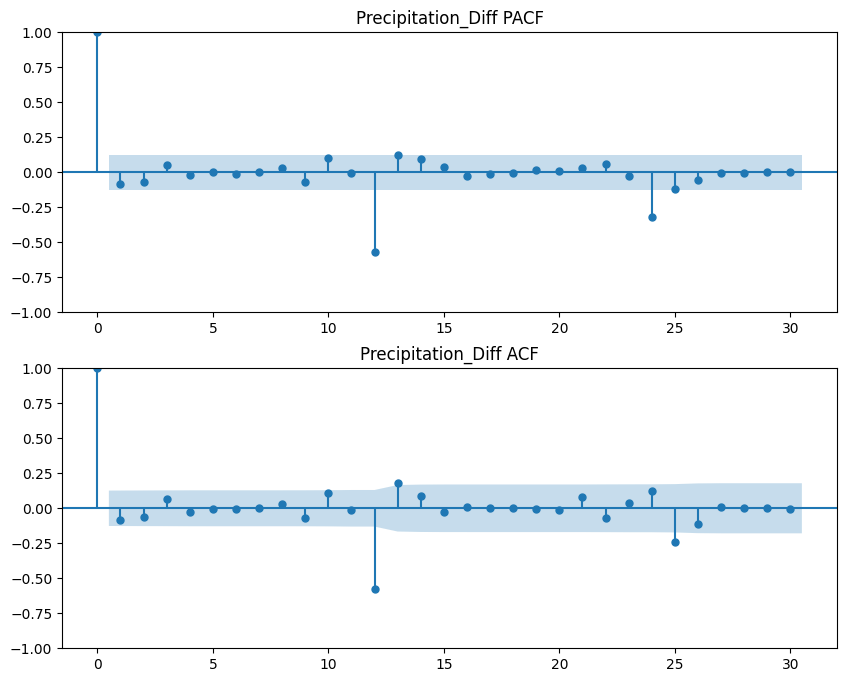

In [27]:

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = plot_pacf(rain['Precipitation_12_Diff'].dropna(), lags=30, ax=ax1)
ax1.set_title('Precipitation_Diff PACF')
ax2 = fig.add_subplot(212)
fig = plot_acf(rain['Precipitation_12_Diff'].dropna(), lags=30, ax=ax2)
ax2.set_title('Precipitation_Diff ACF')

#AR(PACF) = Significant spike at 12 intervals
#MA(ACF) = Only 2 Significant spikes 

PREDICTIONS

In [145]:
from statsmodels.tsa.arima.model import ARIMA

In [146]:
model = ARIMA(endog=rain['Temperature'], order=(7,0,0))

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [147]:
model_fit = model.fit()

In [148]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Temperature   No. Observations:                  252
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -566.686
Date:                Mon, 23 Sep 2024   AIC                           1151.373
Time:                        18:38:40   BIC                           1183.137
Sample:                    01-01-2000   HQIC                          1164.154
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3110      0.118    137.922      0.000      16.079      16.543
ar.L1          0.6565      0.067      9.851      0.000       0.526       0.787
ar.L2         -0.1915      0.081     -2.372      0.018      -0.350      -0.033
ar.L3         -0.1470      0.078     -1.896      0.058      -0.299       0.005
ar.L4         -0.0921      0.075     -1.225      0.221      -0.239       0.055
ar.L5         -0.1363      0.080     -1.702      0.089      -0.293       0.021
ar.L6         -0.0936      0.082     -1.140      0.254      -0.255       0.067
ar.L7         -0.2696      0.066     -4.059      0.000      -0.400      -0.139
sigma2         5.1596      0.450     11.458      0.000       4.277       6.042
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.35   Prob(JB):                         0.38
Heteroskedasticity (H):               0.81   Skew:                             0.16
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
sart_date = dt.date(2020,2,1).strftime("%m/%d/%Y")
end_date = dt.date(2020,12,1).strftime("%m/%d/%Y")

In [218]:
end_date

'12/01/2020'

In [219]:
rain['Temp_forecast'] = model_fit.predict(start=sart_date, end=end_date, dynamic=True)

<Axes: xlabel='Date'>

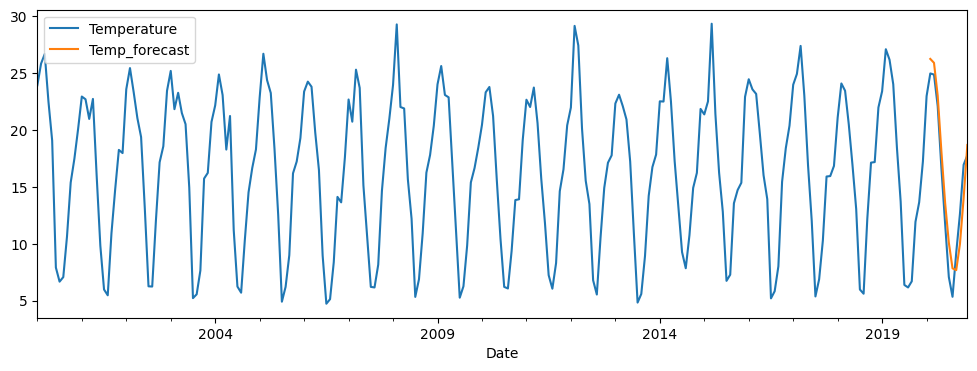

In [220]:
rain[['Temperature', 'Temp_forecast']].plot(figsize=(12,4))

In [153]:
prep = ARIMA(rain['Precipitation'], order=(2,0,2))

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [154]:
prep_fit = prep.fit()

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [155]:
prep_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Precipitation   No. Observations:                  252
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1708.746
Date:                Mon, 23 Sep 2024   AIC                           3429.492
Time:                        18:39:06   BIC                           3450.669
Sample:                    01-01-2000   HQIC                          3438.013
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        205.9688     18.907     10.894      0.000     168.912     243.026
ar.L1          1.7328      0.002   1132.574      0.000       1.730       1.736
ar.L2         -0.9999      0.000  -2164.922      0.000      -1.001      -0.999
ma.L1         -1.7357      0.084    -20.640      0.000      -1.901      -1.571
ma.L2          0.9947      0.096     10.361      0.000       0.807       1.183
sigma2      4.391e+04   4703.789      9.335      0.000    3.47e+04    5.31e+04
===================================================================================
Ljung-Box (L1) (Q):                  11.70   Jarque-Bera (JB):                57.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.96
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [156]:
rain['prep_forecast'] = prep_fit.predict(start=sart_date, end=end_date, dynamic=True)

<Axes: xlabel='Date'>

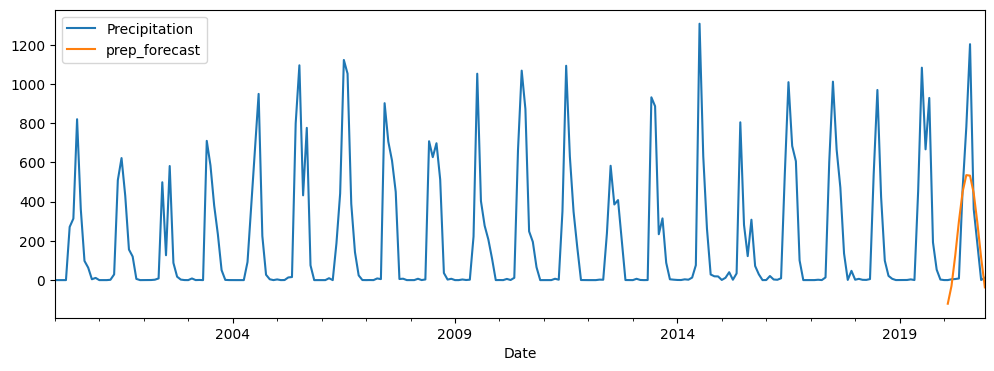

In [157]:
rain[['Precipitation', 'prep_forecast']].plot(figsize=(12,4))

#Precipitation is a seasonal data. lets try SARIMAX

In [158]:
model_2 = sm.tsa.SARIMAX(rain['Precipitation'], 
                       order=(2,0,2), 
                       seasonal_order=(2,0,2, 12))

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [159]:
model2_fit = model_2.fit()

In [160]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      Precipitation   No. Observations:                  252
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 12)   Log Likelihood               -1656.785
Date:                            Mon, 23 Sep 2024   AIC                           3331.571
Time:                                    18:39:31   BIC                           3363.336
Sample:                                01-01-2000   HQIC                          3344.352
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7409      0.052     33.222      0.000       1.638       1.844
ar.L2         -0.9820      0.045    -22.022      0.000      -1.069      -0.895
ma.L1         -1.6873      0.096    -17.580      0.000      -1.875      -1.499
ma.L2          0.9214      0.084     10.935      0.000       0.756       1.087
ar.S.L12      -0.0038      0.004     -1.064      0.288      -0.011       0.003
ar.S.L24       0.9958      0.006    179.453      0.000       0.985       1.007
ma.S.L12       0.1322      0.038      3.456      0.001       0.057       0.207
ma.S.L24      -0.8618      0.030    -28.945      0.000      -0.920      -0.803
sigma2      3.891e+04   3872.266     10.048      0.000    3.13e+04    4.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               227.33
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.64
Prob(H) (two-sided):                  0.74   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
rain['prep2_forecast'] = model2_fit.predict(start=sart_date, end=end_date, dynamic=True)

<Axes: xlabel='Date'>

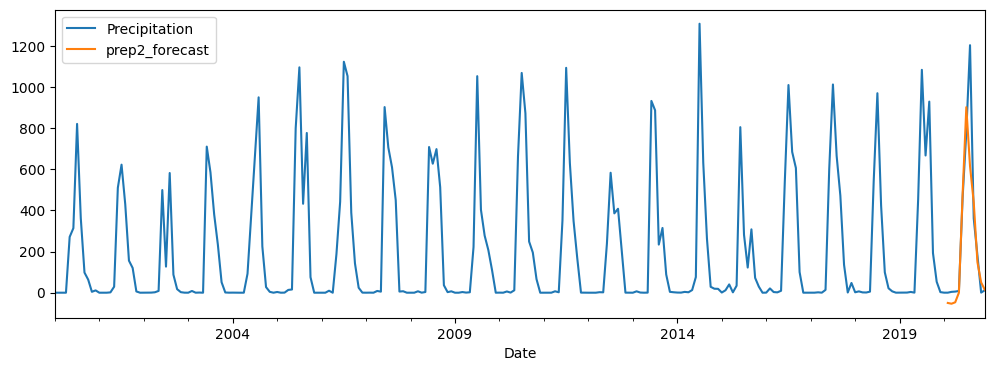

In [162]:
rain[['Precipitation', 'prep2_forecast']].plot(figsize=(12,4))

FORECASTING

In [163]:
from pandas.tseries.offsets import DateOffset

In [164]:
future_dates = [rain.index[-1] + DateOffset(months=x) for x in range(1,25)]

In [165]:
future_dates

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00')]

In [166]:
future_df = pd.DataFrame(index=future_dates, columns = rain.columns)

In [167]:
future_df = pd.concat([rain, future_df])

C:\Users\Hp Pc\AppData\Local\Temp\ipykernel_6324\2006187388.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df = pd.concat([rain, future_df])


In [168]:
future_df.head()

,Specific Humidity,Relative Humidity,Temperature,Precipitation,Precipitation_12_Diff,Temp_forecast,prep_forecast,prep2_forecast
2000-01-01,8.06,48.25,23.93,0.00,NaN,NaN,NaN,NaN
2000-02-01,8.73,50.81,25.83,0.11,NaN,NaN,NaN,NaN
2000-03-01,8.48,42.88,26.68,0.01,NaN,NaN,NaN,NaN
2000-04-01,13.79,55.69,22.49,0.02,NaN,NaN,NaN,NaN
2000-05-01,17.40,70.88,19.07,271.14,NaN,NaN,NaN,NaN


In [169]:
future_df.tail()

,Specific Humidity,Relative Humidity,Temperature,Precipitation,Precipitation_12_Diff,Temp_forecast,prep_forecast,prep2_forecast
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
fore_start = dt.date(2020,11,1).strftime("%m/%d/%Y")
fore_end = dt.date(2022,12,1).strftime("%m/%d/%Y")

future_df['forecast'] = model_fit.predict(start=fore_start, end=fore_end, dynamic=True)

<Axes: >

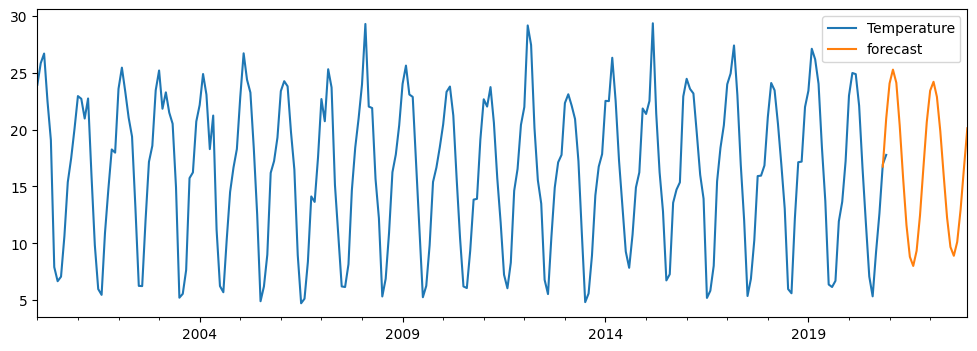

In [174]:
future_df[['Temperature', 'forecast']].plot(figsize=(12,4))

In [175]:
future_df

,Specific Humidity,Relative Humidity,Temperature,Precipitation,Precipitation_12_Diff,Temp_forecast,prep_forecast,prep2_forecast,forecast
2000-01-01,8.06,48.25,23.93,0.00,NaN,NaN,NaN,NaN,NaN
2000-02-01,8.73,50.81,25.83,0.11,NaN,NaN,NaN,NaN,NaN
2000-03-01,8.48,42.88,26.68,0.01,NaN,NaN,NaN,NaN,NaN
2000-04-01,13.79,55.69,22.49,0.02,NaN,NaN,NaN,NaN,NaN
2000-05-01,17.40,70.88,19.07,271.14,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.905660
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.118568
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.952457
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.614865


In [176]:
future_df['p_forecast'] = model2_fit.predict(start=fore_start, end=fore_end, dynamic=True)

<Axes: >

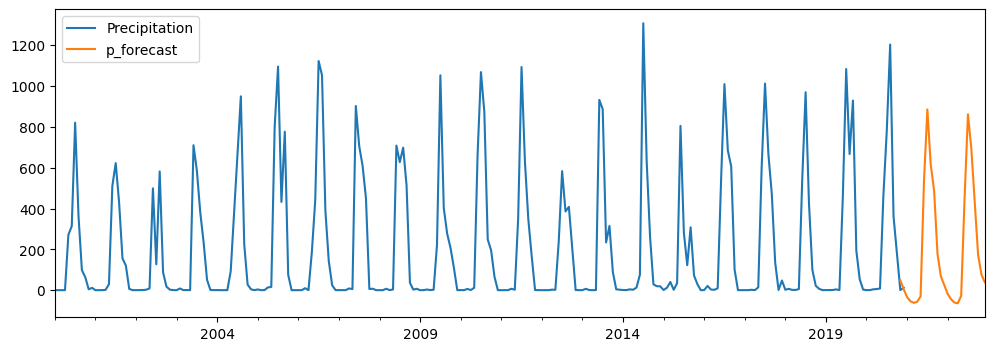

In [177]:
future_df[['Precipitation', 'p_forecast']].plot(figsize=(12,4))

In [178]:
#Try out the forecasting of Precipitation ARIMA model 

future_df['pp_forecast'] = prep_fit.predict(start=fore_start, end=fore_end, dynamic=True)

Text(0.5, 1.0, 'PPT forecast from ARIMA model')

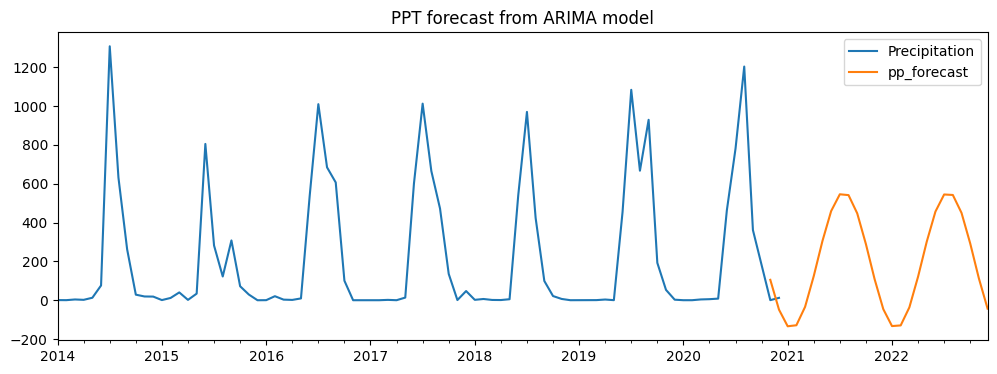

In [210]:
future_df[['Precipitation', 'pp_forecast']].plot(xlim=['1/1/2014', '12/1/2022'],figsize=(12,4))
plt.title('PPT forecast from ARIMA model')

#The Model performs worse (as expected)

In [196]:
#Extracting the forecasted values(Predicted Mean) from the model

forecast = model_fit.get_forecast(steps=26)

In [197]:
fore_df = forecast.predicted_mean
fore_df.index = pd.date_range(start=fore_start, periods=26, freq='MS')

In [198]:
fore_df

2020-11-01    21.928271
2020-12-01    24.447356
2021-01-01    24.428132
2021-02-01    21.292062
2021-03-01    17.050054
2021-04-01    12.825721
2021-05-01    10.373681
2021-06-01     9.130834
2021-07-01     9.546053
2021-08-01    11.682948
2021-09-01    15.233085
2021-10-01    19.081243
2021-11-01    22.113230
2021-12-01    23.369126
2022-01-01    22.725498
2022-02-01    20.466642
2022-03-01    17.210248
2022-04-01    13.753340
2022-05-01    11.006258
2022-06-01     9.704115
2022-07-01    10.212766
2022-08-01    12.346917
2022-09-01    15.479901
2022-10-01    18.749119
2022-11-01    21.301529
2022-12-01    22.487351
Freq: MS, Name: predicted_mean, dtype: float64

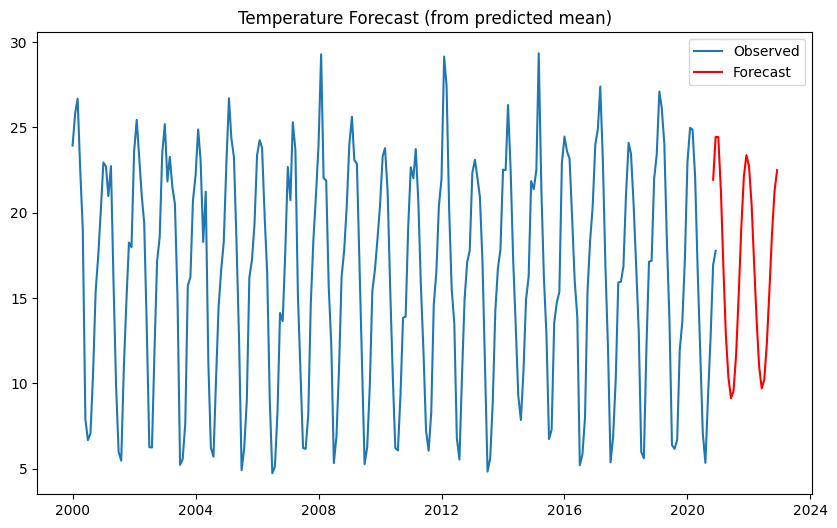

In [221]:
plt.figure(figsize=(10, 6))
plt.plot(rain['Temperature'], label='Observed')
plt.plot(fore_df, label='Forecast', color='red')
plt.title('Temperature Forecast (from predicted mean)')
plt.legend()
plt.show()

In [222]:
#compare

fore_df

2020-11-01    21.928271
2020-12-01    24.447356
2021-01-01    24.428132
2021-02-01    21.292062
2021-03-01    17.050054
2021-04-01    12.825721
2021-05-01    10.373681
2021-06-01     9.130834
2021-07-01     9.546053
2021-08-01    11.682948
2021-09-01    15.233085
2021-10-01    19.081243
2021-11-01    22.113230
2021-12-01    23.369126
2022-01-01    22.725498
2022-02-01    20.466642
2022-03-01    17.210248
2022-04-01    13.753340
2022-05-01    11.006258
2022-06-01     9.704115
2022-07-01    10.212766
2022-08-01    12.346917
2022-09-01    15.479901
2022-10-01    18.749119
2022-11-01    21.301529
2022-12-01    22.487351
Freq: MS, Name: predicted_mean, dtype: float64

In [223]:
temp2 = future_df[['forecast']].loc['2020-11-01': '2022-12-01']

In [224]:
temp_forecast = pd.concat([fore_df, temp2], axis=1)

In [225]:
temp_forecast

,predicted_mean,forecast
2020-11-01,21.928271,16.740637
2020-12-01,24.447356,20.950442
2021-01-01,24.428132,24.056326
2021-02-01,21.292062,25.266244
2021-03-01,17.050054,24.110080
2021-04-01,12.825721,20.349360
2021-05-01,10.373681,15.761875
2021-06-01,9.130834,11.600511
2021-07-01,9.546053,8.815616
2021-08-01,11.682948,8.011711


Text(0.5, 1.0, 'Compared Predicted Mean and Forecast of Temperature Levels')

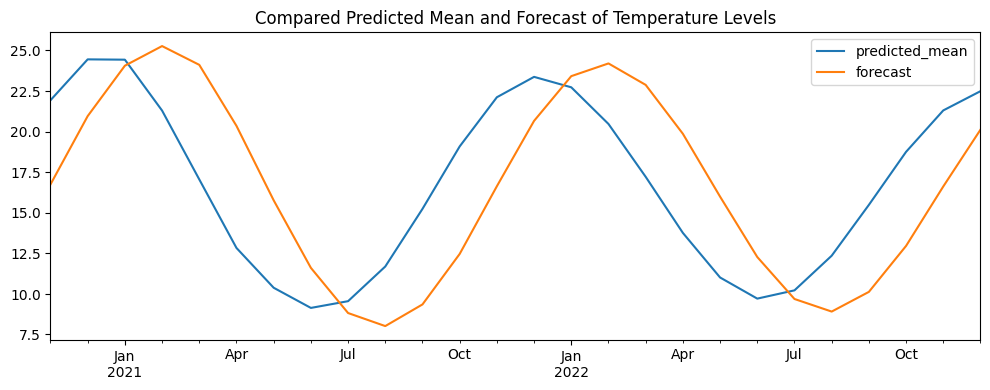

In [226]:
temp_forecast.plot(figsize=(12,4))
plt.title('Compared Predicted Mean and Forecast of Temperature Levels')